# Improving the Annotation of DeepFashion Images for Fine-grained Attribute Recognition

In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
df_attr_combined = pd.read_csv('./Anno/changed/attr_combined.csv')

In [3]:
df_category_combined = pd.read_csv('./Anno/changed/category_combined.csv')
df_attr_cloth = pd.read_csv('./Anno/changed/list_attr_cloth.txt', sep = ',') 

## Step 1: Fine-grained categories with sufficient training samples

In [4]:
category_frequency= df_category_combined.groupby(['category_name'])['image_name'].count()
category_frequency_sort = category_frequency.sort_values(ascending=False)
print(category_frequency_sort)

category_name
Dress          72158
Tee            36887
Blouse         24557
Shorts         19666
Tank           15429
Skirt          14773
Cardigan       13311
Sweater        13123
Jacket         10467
Top            10078
Blazer          7495
Romper          7408
Jeans           7076
Jumpsuit        6153
Leggings        5013
Joggers         4416
Hoodie          4048
Sweatpants      3048
Kimono          2294
Coat            2120
Cutoffs         1669
Sweatshorts     1106
Poncho           791
Jersey           748
Henley           716
Parka            676
Jeggings         594
Chinos           527
Culottes         486
Trunks           386
Button-Down      330
Flannel          324
Bomber           309
Anorak           160
Robe             150
Turtleneck       146
Kaftan           126
Peacoat           97
Capris            77
Onesie            70
Caftan            54
Gauchos           49
Jodhpurs          45
Sarong            32
Coverup           17
Halter            17
Name: image_name, dt

In [5]:
dict_category_frequency_sort = category_frequency_sort.to_dict()

In [6]:
lst_cate = []
for i,cate in enumerate(dict_category_frequency_sort):
    if dict_category_frequency_sort[cate] > 6000:
        print(cate)
        lst_cate.append(cate)

Dress
Tee
Blouse
Shorts
Tank
Skirt
Cardigan
Sweater
Jacket
Top
Blazer
Romper
Jeans
Jumpsuit


In [142]:
df_category_combined_improved = df_category_combined[df_category_combined['category_name'].isin(lst_cate)]

In [143]:
df_category_combined_improved.head()

,category_label,category_name,category_type,image_name
160,2,Blazer,1,img/Single-Button_Blazer/img_00000001.jpg
161,2,Blazer,1,img/Single-Button_Blazer/img_00000002.jpg
162,2,Blazer,1,img/Single-Button_Blazer/img_00000003.jpg
163,2,Blazer,1,img/Single-Button_Blazer/img_00000004.jpg
164,2,Blazer,1,img/Single-Button_Blazer/img_00000005.jpg


In [9]:
file_name = "category_combined_improved.csv"
df_category_combined_improved.to_csv("./Anno/changed/improved/"+file_name, index=None)

In [10]:
category_frequency_improved= df_category_combined_improved.groupby(['category_name'])['image_name'].count()
category_frequency_sort_improved = category_frequency_improved.sort_values(ascending=False)

## Result
Through empirical experiments with the convolutional neural network that we have used for fine-grained attribute recognition, we came to
conclusion that at least 6000 samples are required for the loss to converge.
After removing categories with not enough images,14 remained

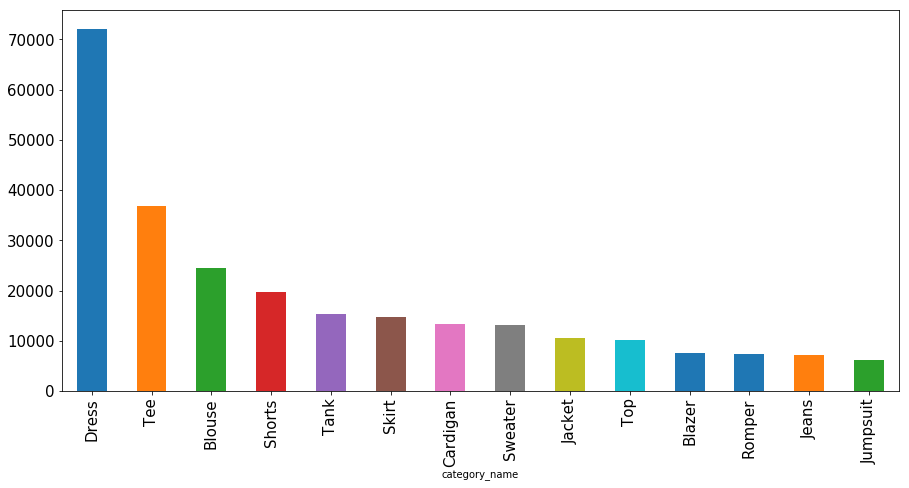

In [154]:
category_frequency_sort_improved.plot(kind = 'bar', figsize=(15,7), fontsize = 15)
plt.savefig('result/drop_categories.png')

## 2. Available attributes and enough attributes

In [12]:
attr_frequency = (df_attr_combined.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort=attr_frequency.sort_values(ascending = False)
total_img = len(df_attr_combined['image_name'])

In [13]:
attr_frequency_sort

print                      37367
floral                     24188
lace                       20434
knit                       18498
sleeve                     17828
maxi                       15990
shirt                      14920
denim                      13178
striped                    11771
chiffon                    11735
crochet                     8987
stripe                      8591
sleeveless                  7987
summer                      7616
floral print                7560
fit                         7489
cotton                      7370
leather                     7334
faux                        7243
classic                     7184
graphic                     6933
pleated                     6755
red                         6717
long sleeve                 6656
embroidered                 6621
pink                        6569
printed                     6568
bodycon                     6419
crop                        6221
skater                      6205
          

In [14]:
dict_attr_frequency_sort = attr_frequency_sort.to_dict()

In [15]:
dict_attr_frequency_sort

{'print ': 37367,
 'floral ': 24188,
 'lace ': 20434,
 'knit ': 18498,
 'sleeve ': 17828,
 'maxi ': 15990,
 'shirt ': 14920,
 'denim ': 13178,
 'striped ': 11771,
 'chiffon ': 11735,
 'crochet ': 8987,
 'stripe ': 8591,
 'sleeveless ': 7987,
 'summer ': 7616,
 'floral print ': 7560,
 'fit ': 7489,
 'cotton ': 7370,
 'leather ': 7334,
 'faux ': 7243,
 'classic ': 7184,
 'graphic ': 6933,
 'pleated ': 6755,
 'red ': 6717,
 'long sleeve ': 6656,
 'embroidered ': 6621,
 'pink ': 6569,
 'printed ': 6568,
 'bodycon ': 6419,
 'crop ': 6221,
 'skater ': 6205,
 'mini ': 6065,
 'love ': 5942,
 'abstract ': 5643,
 'muscle ': 5565,
 'v-neck ': 5493,
 'collar ': 5458,
 'skinny ': 5227,
 'pocket ': 5193,
 'mesh ': 5109,
 'button ': 5057,
 'shift ': 5025,
 'trim ': 5002,
 'wash ': 4919,
 'flare ': 4841,
 'tribal ': 4823,
 'woven ': 4744,
 'midi ': 4660,
 'drawstring ': 4588,
 'strapless ': 4358,
 'sheer ': 4287,
 'faux leather ': 4259,
 'cami ': 4151,
 'cut ': 4006,
 'hooded ': 3958,
 'rose ': 3902,


In [16]:
lst_few_attr = []
for i,attr in enumerate(dict_attr_frequency_sort):
    if (dict_attr_frequency_sort[attr]/total_img)*100 < 0.02:
        lst_few_attr.append(attr)

In [17]:
len(lst_few_attr)

46

In [144]:
df_attr_combined_improved = df_attr_combined.drop([col for col in lst_few_attr], axis = 1)

In [145]:
df_attr_combined_improved.head()

,image_name,a-line,abstract,abstract chevron,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [20]:
file_name = "attr_combined_improved.csv"
df_attr_combined_improved.to_csv("./Anno/changed/improved/"+file_name, index=None)

In [141]:
attr_frequency_improved= (df_attr_combined_improved.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort_improved = attr_frequency_improved.sort_values(ascending=False)

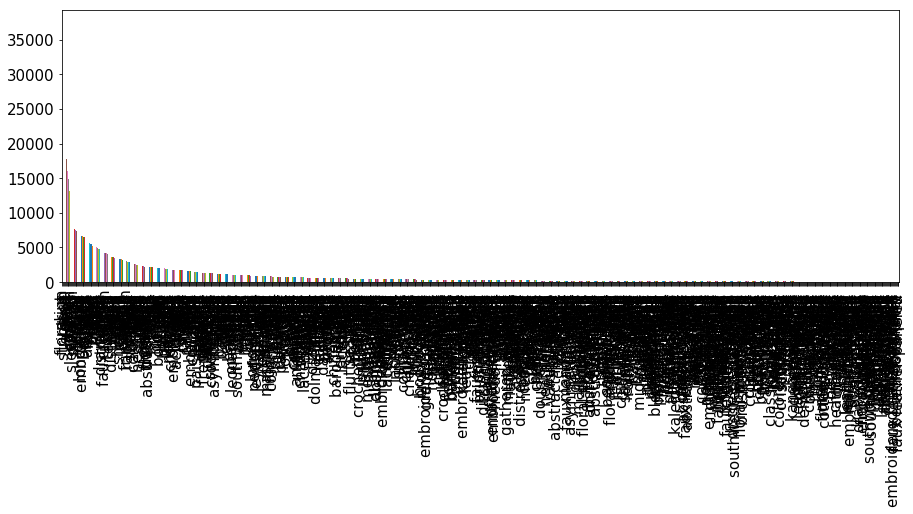

In [84]:
attr_frequency_sort_improved.plot(kind = 'bar', figsize=(15,5), fontsize = 15)

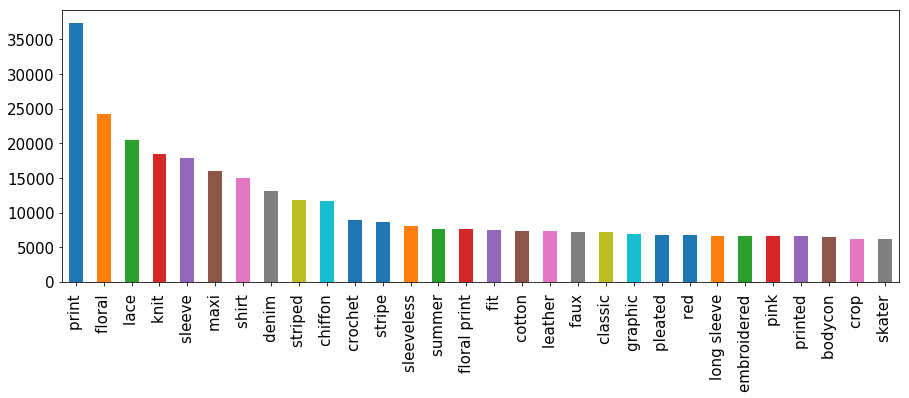

In [23]:
attr_frequency_sort_improved[:30].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

## 3. Merging duplicate annotations

Overlapping attributes contributes to the imbalance of the dataset.
We have improved the annotations by merging the visually similar attributes
and have removed the duplicates.

## compute correlation

In [92]:
lst = []
f1 = list(['printed ', 'print '])
f2 = list(['dot ', 'polka dot '])
f3 = list(['fringed ', 'fringe '])

In [148]:
df_attr_combined_improved[list(['printed ', 'print '])].corr()

,printed,print
printed,1.000000,0.013522
print,0.013522,1.000000


In [149]:
df_attr_combined_improved[list(['fringed ', 'fringe '])].corr()

,fringed,fringe
fringed,1.000000,0.071619
fringe,0.071619,1.000000


In [150]:
df_attr_combined_improved[list(['crop ','cropped '])].corr()

,crop,cropped
crop,1.000000,0.088637
cropped,0.088637,1.000000


In [151]:
df_attr_combined_improved[list(['stripe ','striped '])].corr()

,stripe,striped
stripe,1.000000,0.049202
striped,0.049202,1.000000


In [152]:
df_attr_combined_improved[list(['dot ', 'polka dot '])].corr()

,dot,polka dot
dot,1.000000,0.840943
polka dot,0.840943,1.000000


In [98]:
df_attr_combined_improved[list(['zig ','zigzag '])].corr()

,zig,zigzag
zig,1.000000,0.025302
zigzag,0.025302,1.000000


In [99]:
df_attr_combined_improved[list(['floral ','floral print '])].corr()

,floral,floral print
floral,1.00000,0.54231
floral print,0.54231,1.00000


In [100]:
df_attr_combined_improved[list(['knit ','crochet '])].corr()

,knit,crochet
knit,1.000000,-0.000716
crochet,-0.000716,1.000000


In [157]:
df_attr_combined_improved['printed ']

0        -1
1        -1
2        -1
3        -1
4        -1
5        -1
6        -1
7        -1
8        -1
9        -1
10       -1
11       -1
12       -1
13       -1
14       -1
15       -1
16       -1
17       -1
18       -1
19       -1
20       -1
21       -1
22       -1
23       -1
24       -1
25       -1
26       -1
27       -1
28       -1
29       -1
         ..
289192    1
289193   -1
289194   -1
289195   -1
289196   -1
289197   -1
289198   -1
289199   -1
289200   -1
289201   -1
289202   -1
289203   -1
289204   -1
289205   -1
289206   -1
289207   -1
289208   -1
289209   -1
289210   -1
289211   -1
289212   -1
289213    1
289214    1
289215   -1
289216   -1
289217   -1
289218   -1
289219   -1
289220   -1
289221   -1
Name: printed , Length: 289222, dtype: int64

In [172]:
(df_attr_combined_improved['print '] == 1)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15         True
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
289192    False
289193    False
289194    False
289195    False
289196     True
289197     True
289198     True
289199     True
289200     True
289201    False
289202     True
289203    False
289204     True
289205     True
289206     True
289207     True
289208    False
289209     True
289210    False
289211     True
289212     True
289213    False
289214     True
289215     True
289216    False
289217     True
289218    False
289219    False
289220     True
289221    False
Name: print , Length: 28

In [171]:
(df_attr_combined_improved['printed '] == 1)

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
289192     True
289193    False
289194    False
289195    False
289196    False
289197    False
289198    False
289199    False
289200    False
289201    False
289202    False
289203    False
289204    False
289205    False
289206    False
289207    False
289208    False
289209    False
289210    False
289211    False
289212    False
289213     True
289214     True
289215    False
289216    False
289217    False
289218    False
289219    False
289220    False
289221    False
Name: printed , Length: 

In [174]:
df_attr_combined_improved

,image_name,a-line,abstract,abstract chevron,abstract floral,abstract floral print,abstract geo,abstract geo print,abstract paisley,abstract pattern,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,img/Sheer_Pleated-Front_Blouse/img_00000007.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,img/Sheer_Pleated-Front_Blouse/img_00000008.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,img/Sheer_Pleated-Front_Blouse/img_00000009.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,img/Sheer_Pleated-Front_Blouse/img_00000010.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [115]:
def mergeColumns(col1, col2) :
    df_attr_combined_improved.insert(1,
                                     col1+'_m',
                                     ((df_attr_combined_improved[col1] == 1) | (df_attr_combined_improved[col2] == 1)).astype(int).replace(0, -1))
    df_attr_combined_improved.drop([col1, col2], axis=1, inplace=True)

In [102]:
mergeColumns('fringed ', 'fringe ')
mergeColumns('dot ', 'polka dot ')
mergeColumns('crop ','cropped ')
mergeColumns('stripe ','striped ')
mergeColumns('print ','printed ')



mergeColumns('pleat ','pleated ')
mergeColumns('floral ','floral print ')


In [109]:
df_attr_combined_improved.head()

,image_name,print _m,floral _m,pleat _m,stripe _m,crop _m,dot _m,fringed _m,a-line,abstract,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [110]:
attr_frequency_improved= (df_attr_combined_improved.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort_improved = attr_frequency_improved.sort_values(ascending=False)

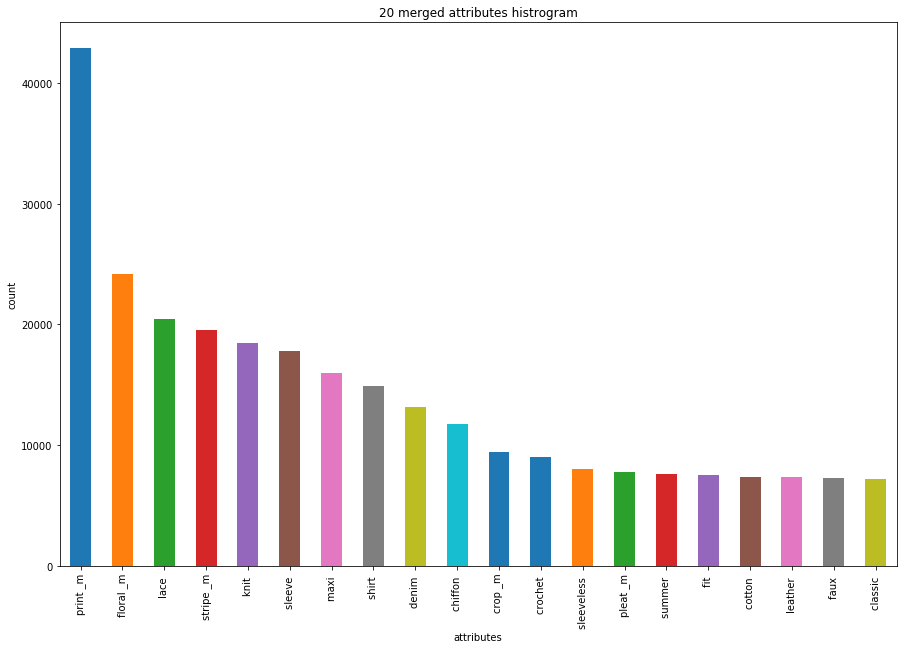

In [114]:
attr_frequency_sort_improved[:20].plot(kind = 'bar', figsize=(15,10), fontsize = 10)
plt.title("20 merged attributes histrogram")
plt.xlabel("attributes")
plt.ylabel("count")
plt.savefig('result/20_merged_attr_hist.png')

In [112]:
attr_frequency_sort_improved.head(30)

print _m        42891
floral _m       24188
lace            20434
stripe _m       19535
knit            18498
sleeve          17828
maxi            15990
shirt           14920
denim           13178
chiffon         11735
crop _m          9429
crochet          8987
sleeveless       7987
pleat _m         7782
summer           7616
fit              7489
cotton           7370
leather          7334
faux             7243
classic          7184
graphic          6933
red              6717
long sleeve      6656
embroidered      6621
pink             6569
bodycon          6419
skater           6205
mini             6065
love             5942
abstract         5643
dtype: int64

In [7]:
def mergeColumn(col1, col2) :
    df_merge_example.insert(1,
                            col1+'_m',
                            ((df_merge_example[col1] == 1) | (df_merge_example[col2] == 1)).astype(int).replace(0, -1))
    df_merge_example.drop([col1, col2], axis=1, inplace=True)

In [4]:
def mergeC(col1, col2) :
    df_merge_example[col1] = ((df_merge_example[col1] == 1) | (df_merge_example[col2] == 1)).astype(int).replace(0, -1)
    df_merge_example.drop([col2], axis=1, inplace=True)

In [5]:
def mergeCol(col1, col2) :
    return ((df_merge_example[col1] == 1) | (df_merge_example[col2] == 1)).astype(int).replace(0, -1)

In [92]:
df_merge_example = pd.DataFrame({
                    'attribute1': pd.Series([1, -1, -1, -1]),
                    'attribute2': pd.Series([-1, 1, -1, -1]),
                    'attribute3': pd.Series([-1, -1, 1, -1]),
                    'attribute4': pd.Series([-1, -1, -1, -1]),
                    'attribute5': pd.Series([-1, -1, -1, 1]),
}
    )

In [93]:
df_merge_example

,attribute1,attribute2,attribute3,attribute4,attribute5
0,1,-1,-1,-1,-1
1,-1,1,-1,-1,-1
2,-1,-1,1,-1,-1
3,-1,-1,-1,-1,1


In [94]:
df_merge_example[df_merge_example.columns[0]]

0    1
1   -1
2   -1
3   -1
Name: attribute1, dtype: int64

In [95]:
df_merge_example.columns[0]

'attribute1'

In [96]:
len(df_merge_example.columns)

5

In [97]:
tmp = mergeCol(df_merge_example.columns[0], df_merge_example.columns[1])

In [98]:
lst_tmp = ['attribute1', 'attribute2', 'attribute3', 'attribute4', 'attribute5']

tmp = mergeCol(df_merge_example.columns[0], df_merge_example.columns[1])

df_merge_example.insert(loc=0, column='tmp', value=tmp)
print(df_merge_example)

for i in range(2,len(lst_tmp)):
    #tmp = mergeCol('tmp', df_merge_example.columns[i+1])
    df_merge_example['tmp'] = mergeCol('tmp', df_merge_example.columns[i+1])
    print("("+str(i)+")")
    print(df_merge_example.columns[i])
    print(df_merge_example)


   tmp  attribute1  attribute2  attribute3  attribute4  attribute5
0    1           1          -1          -1          -1          -1
1    1          -1           1          -1          -1          -1
2   -1          -1          -1           1          -1          -1
3   -1          -1          -1          -1          -1           1
(2)
attribute2
   tmp  attribute1  attribute2  attribute3  attribute4  attribute5
0    1           1          -1          -1          -1          -1
1    1          -1           1          -1          -1          -1
2    1          -1          -1           1          -1          -1
3   -1          -1          -1          -1          -1           1
(3)
attribute3
   tmp  attribute1  attribute2  attribute3  attribute4  attribute5
0    1           1          -1          -1          -1          -1
1    1          -1           1          -1          -1          -1
2    1          -1          -1           1          -1          -1
3   -1          -1          -1  

In [ ]:
def mergeMultipleColumns(lst_tmp):
    
    tmp_col_value = mergeCol(df_merge_example.columns[0], df_merge_example.columns[1])

    df_merge_example.insert(loc=0, column='tmp', value=tmp)

    for i in range(2,len(lst_tmp)):
        df_merge_example['tmp'] = mergeCol('tmp', df_merge_example.columns[i+1])

In [73]:
df_merge_example

,tmp,attribute1,attribute2,attribute3,attribute4,attribute5
0,1,1,-1,-1,-1,-1
1,1,-1,1,-1,-1,-1
2,1,-1,-1,1,-1,-1
3,1,-1,-1,-1,-1,1


In [28]:
mergeCol('attribute1', 'attribute2')

0    1
1    1
2    1
3   -1
dtype: int32

In [9]:
df_merge_example

,attribute1,attribute2
0,1,1
1,1,-1
2,-1,1
3,-1,-1


In [18]:
df_merge_example['attribute1']

0    1
1    1
2   -1
3   -1
Name: attribute1, dtype: int64

In [19]:
mergeC('attribute1', 'attribute2')

In [20]:
df_merge_example

,attribute1
0,1
1,1
2,1
3,-1


In [10]:
mergeColumn('attribute1', 'attribute2')

In [11]:
df_merge_example

,attribute1_m
0,1
1,1
2,1
3,-1
